In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [6]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [8]:
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [9]:
X = df[["Age",'Annual Income (k$)','Spending Score (1-100)']]

In [10]:
scale = StandardScaler()

In [11]:
X_scale = scale.fit_transform(X)

In [13]:
pca = PCA(n_components=2,random_state=42)

In [14]:
X_PCA = pca.fit_transform(X_scale)

In [40]:
DensityBaseAlgo = DBSCAN(eps=0.3333333)

In [41]:
label = DensityBaseAlgo.fit_predict(X_PCA)

In [42]:
df["Label"] = label

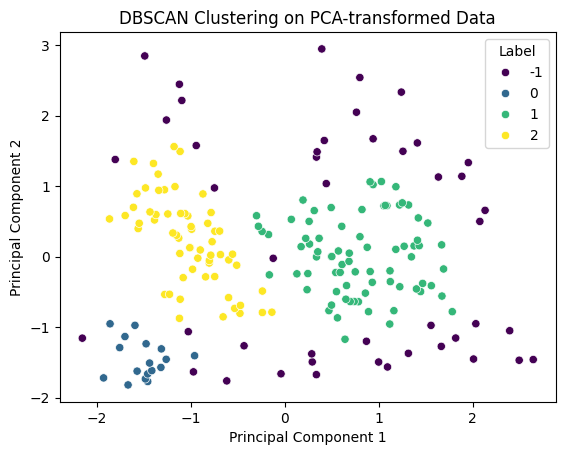

In [43]:
sns.scatterplot(x=X_PCA[:, 0], y=X_PCA[:, 1], hue=df['Label'], palette='viridis')
plt.title('DBSCAN Clustering on PCA-transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()